# Laboratorium 1 - preprocessing danych

#### Wczytywanie danych

In [78]:
import pandas as pd

df = pd.read_csv('lab1/dataset/crx.data',sep=',', header=None)
print(df.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14  15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  + 
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0   +


#### Opracowanie danych

In [79]:
numeric_columns = [1, 2, 7, 10, 13, 14]
nominal_columns = [0, 3, 4, 5, 6, 8, 9, 11, 12]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df[nominal_columns] = df[nominal_columns].apply(lambda x: x.fillna(x.mode()[0]))

df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


#### Wizualizacja rozkładu wartości

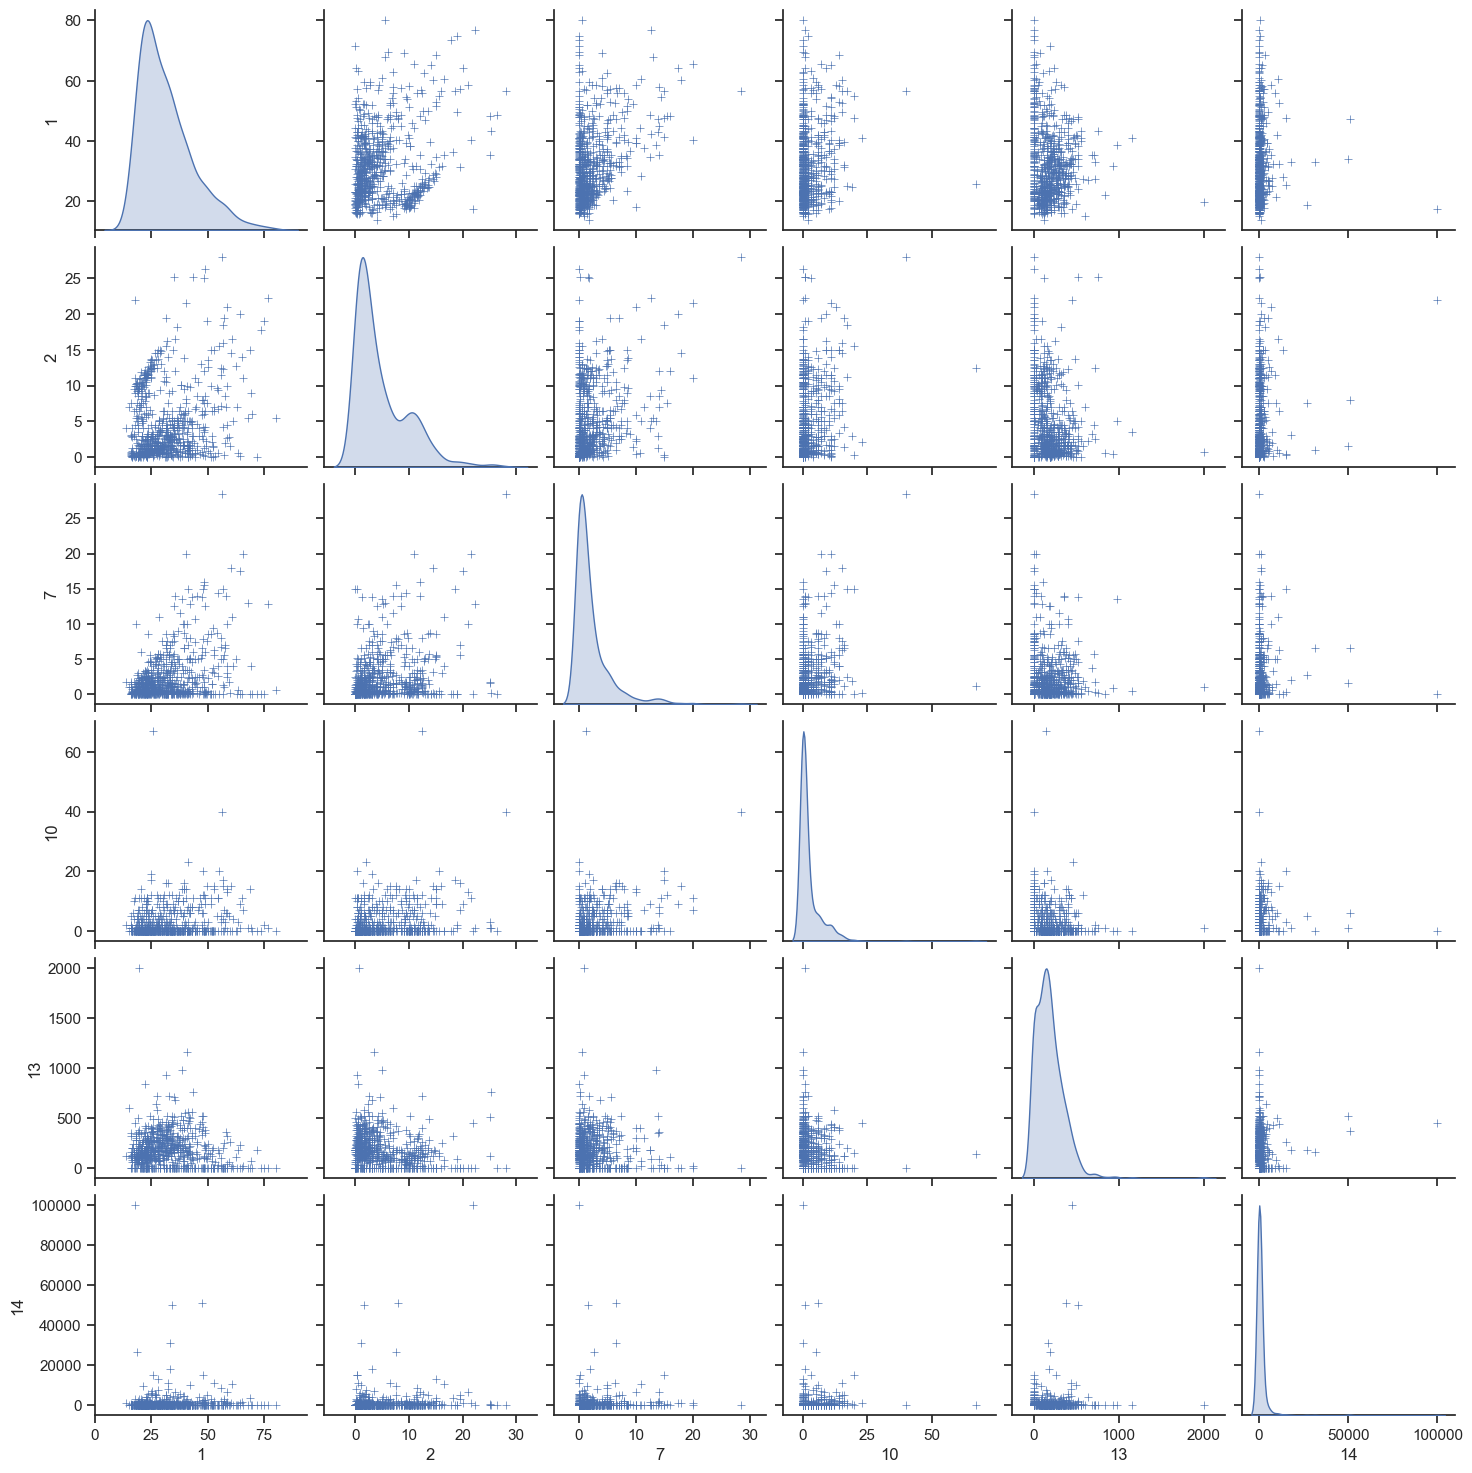

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.pairplot(df, diag_kind='kde', markers='+')
plt.show()

#### Kodowanie wartości nominalnych

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_label_encoded = df.copy()

label_encoders = {}
for col in nominal_columns:
    label_encoders[col] = LabelEncoder()
    df_label_encoded[col] = label_encoders[col].fit_transform(df[col])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')

df_onehot_encoded = df.copy()


df_label_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202.0,0,+
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43.0,560,+
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280.0,824,+
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100.0,3,+
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,21.08,10.085,3,3,5,4,1.25,0,0,0,0,0,260.0,0,-
686,1,22.67,0.750,2,1,2,8,2.00,0,1,2,1,0,200.0,394,-
687,1,25.25,13.500,3,3,6,3,2.00,0,1,1,1,0,200.0,1,-
688,2,17.92,0.205,2,1,1,8,0.04,0,0,0,0,0,280.0,750,-


#### Skalowanie cech

##### Min-max scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns = [1,2,7,10,13,14]

scaled_features = scaler.fit_transform(df[columns])

df[columns] = scaled_features

print(df)

    0         1         2  3  4   5   6         7  8  9         10 11 12   
0    b  0.256842  0.000000  u  g   w   v  0.043860  t  t  0.014925  f  g  \
1    a  0.675489  0.159286  u  g   q   h  0.106667  t  t  0.089552  f  g   
2    a  0.161654  0.017857  u  g   q   h  0.052632  t  f  0.000000  f  g   
3    b  0.211729  0.055000  u  g   w   v  0.131579  t  t  0.074627  t  g   
4    b  0.096541  0.200893  u  g   w   v  0.060000  t  f  0.000000  f  s   
..  ..       ...       ... .. ..  ..  ..       ... .. ..       ... .. ..   
685  b  0.110226  0.360179  y  p   e   h  0.043860  f  f  0.000000  f  g   
686  a  0.134135  0.026786  u  g   c   v  0.070175  f  t  0.029851  t  g   
687  a  0.172932  0.482143  y  p  ff  ff  0.070175  f  t  0.014925  t  g   
688  b  0.062707  0.007321  u  g  aa   v  0.001404  f  f  0.000000  f  g   
689  b  0.319549  0.120536  u  g   c   h  0.290877  f  f  0.000000  t  g   

         13       14  15  
0    0.1010  0.00000  +   
1    0.0215  0.00560   +  
2    0

##### Standarization

In [38]:
from sklearn.preprocessing import StandardScaler

selected_columns = [1, 2, 7, 10, 13, 14]

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df[selected_columns])

df[selected_columns] = standardized_features

print(df)

    0         1         2  3  4   5   6         7  8  9         10 11 12   
0    b -0.062321 -0.956613  u  g   w   v -0.291083  t  t -0.288101  f  g  \
1    a  2.288101 -0.060051  u  g   q   h  0.244190  t  t  0.740830  f  g   
2    a -0.596738 -0.856102  u  g   q   h -0.216324  t  f -0.493887  f  g   
3    b -0.315599 -0.647038  u  g   w   v  0.456505  t  t  0.535044  t  g   
4    b -0.962303  0.174141  u  g   w   v -0.153526  t  f -0.493887  f  s   
..  ..       ...       ... .. ..  ..  ..       ... .. ..       ... .. ..   
685  b -0.885475  1.070704  y  p   e   h -0.291083  f  f -0.493887  f  g   
686  a -0.751238 -0.805846  u  g   c   v -0.066806  f  t -0.082314  t  g   
687  a -0.533418  1.757198  y  p  ff  ff -0.066806  f  t -0.288101  t  g   
688  b -1.152262 -0.915403  u  g  aa   v -0.652915  f  f -0.493887  f  g   
689  b  0.289736 -0.278161  u  g   c   h  1.814125  f  f -0.493887  t  g   

           13        14  15  
0    0.104544 -0.195413  +   
1   -0.819689 -0.087852   +